# Regresión Logística de Cáncer de mama

El siguiente notebook contiene análisis exploratorio de datos y posterior clasificación si un cáncer es benigno o maligno.

Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa. 

<img src='/work/Breast-Cancer/Breast Cancer.jpg'>

### Informacion de los atributos:
+ **ID number:** Numero de identificación
+ **Diagnosis(M = malignant, B = benign):** Diagnostico (Maligno o Benigno)


**Se calculan diez características de valor real para cada núcleo celular:**
+ **a) radius:** Media de las distancias desde el centro a los puntos del perímetro.
+ **a) texture:** Desviación estándar de los valores de escala de grises.
+ **a) perimeter:** Perimetro.
+ **a) area:** Area
+ **a) smoothness:** Variación local en las longitudes de radio.
+ **a) compactness:** Perimetro ^2 / area - 1.0.
+ **a) concavity :** Severidad de las porciones cóncavas del contorno.
+ **a) concave points:** Número de porciones cóncavas del contorno.
+ **a) symmetry:** Simetría.
+ **a) fractal dimension:** "Aproximación de la costa" - 1

Cada atributo cuenta con 3 variables, las cuales corresponden a media(mean), error estandar(se) y peor caso(worst.).
Esta muestra cuenta con 357 datos beningnos y 212 datos malignos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import session_info

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score

## Carga de datos

In [1]:
df_cancer = pd.read_csv('/work/Breast-Cancer/Breast Cancer.csv')

In [3]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Eliminar datos nulos

In [5]:
df_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df_cancer = df_cancer.drop(["Unnamed: 32"], axis=1)
df_cancer = df_cancer.drop(["id"], axis=1)
df_cancer.shape

(569, 31)

Se eliminan estas dos variables ya que no tienen inferencia sobre el diagnostico.

## Analizando variable DIAGNOSIS

In [7]:
df_cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Convertir a numérica variable objetivo

In [9]:
df_cancer["diagnosis"].replace({"M":1, "B":0}, inplace=True)
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


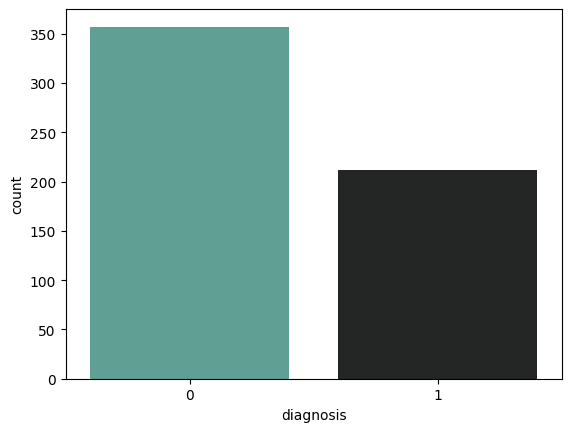

In [10]:
sns.countplot(x= df_cancer['diagnosis'],palette='dark:#5A9_r')
plt.show()

In [11]:
df_cancer.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


En esta tabla podemos observar los valores promedios de las variables si un tumor es Benigno= 0, o Maligno= 1.

## Análisis de correlación

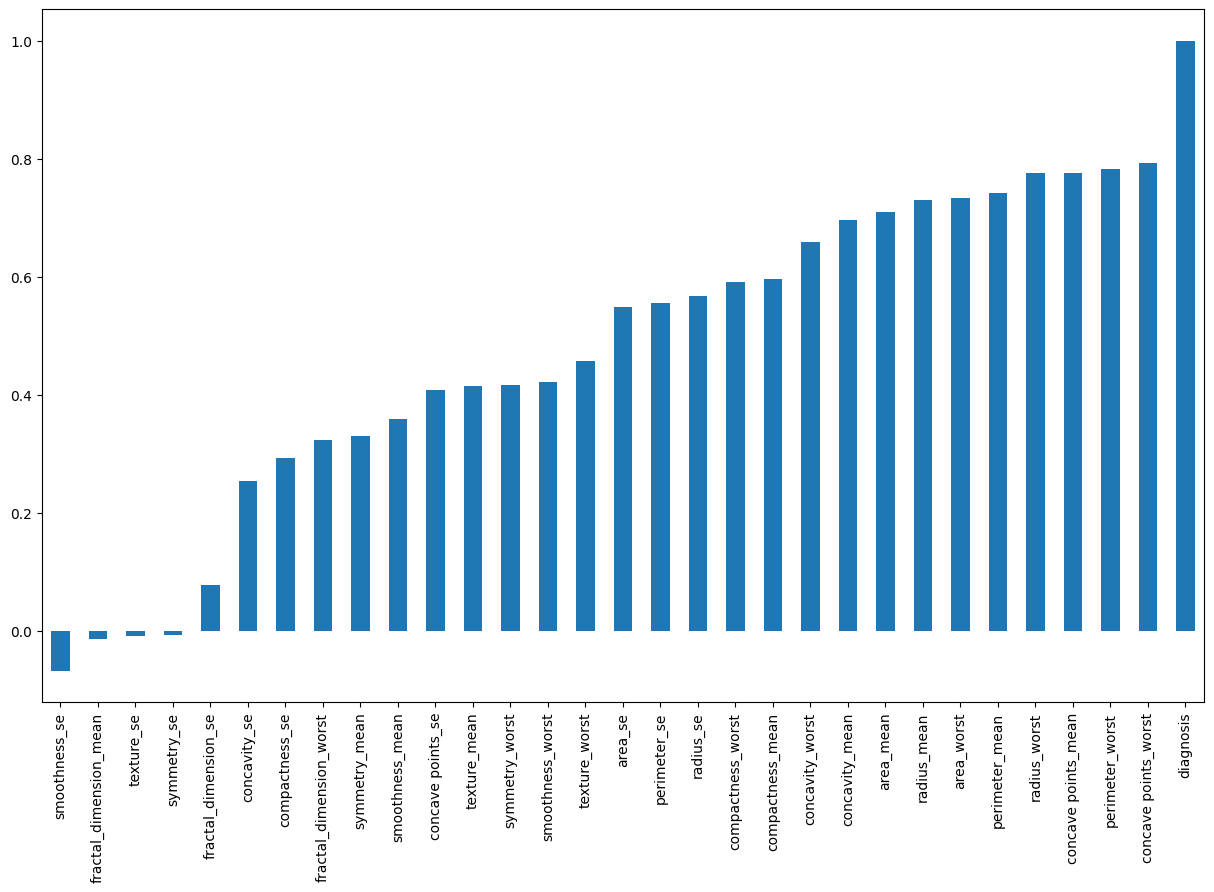

In [12]:
fig = plt.figure(figsize=(15,9))
df_cancer.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

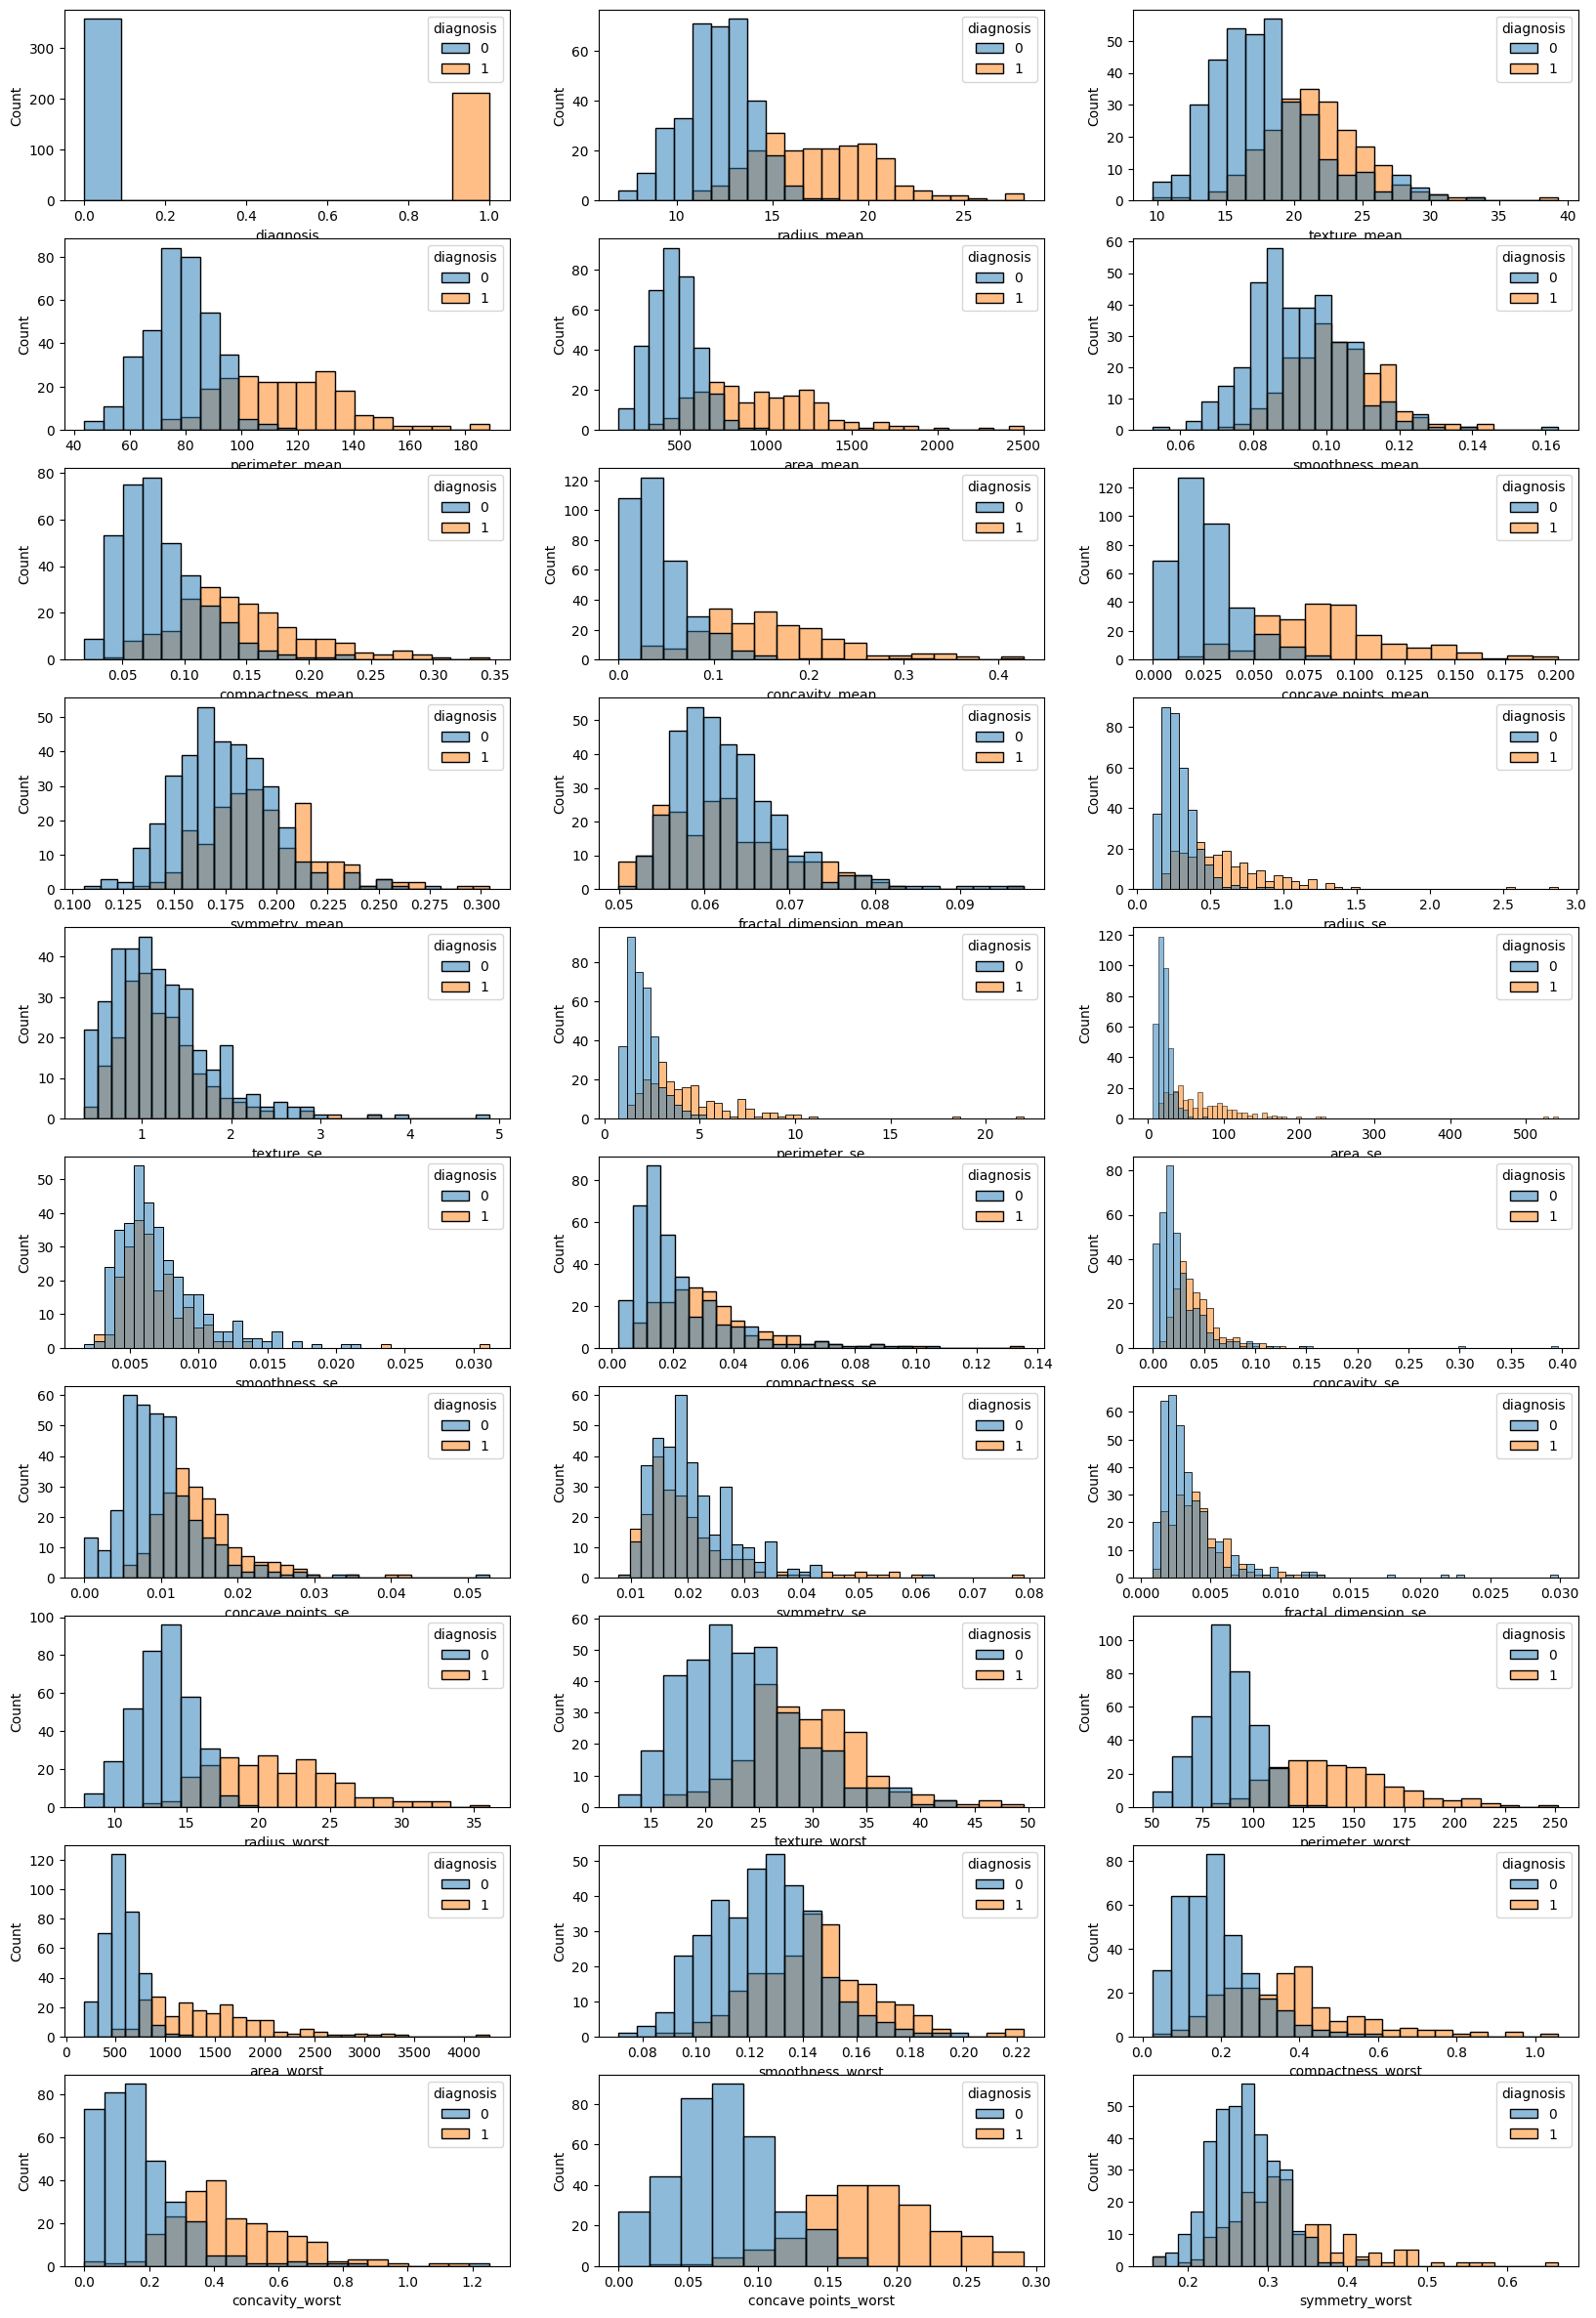

In [13]:
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 30), sharex=False, sharey=False)
for i, variable in enumerate(df_cancer.columns[:-1]):
    row = i // 3
    col = i % 3
    sns.histplot(data=df_cancer, x=variable, hue='diagnosis', ax=axs[row][col])
plt.show()

## Escalado de datos

Para mejorar la precisión del modelo y reducir el tiempo de entrenamiento se realizará un escalado de datos.

In [14]:
scaler = MinMaxScaler()
df_cancer_scaled =  scaler.fit_transform(df_cancer)

In [15]:
df_cancer_scaled = pd.DataFrame(df_cancer_scaled)

In [16]:
df_cancer_scaled.columns = df_cancer.columns
df_cancer_scaled 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


## Entrenamiento de Regresión Logística

In [17]:
X = df_cancer_scaled.drop('diagnosis',axis=1)
y = df_cancer_scaled['diagnosis'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
model= LogisticRegression()
result= model.fit(X_train, y_train)

## Evaluando el modelo

In [20]:
prediction_test= model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test)
accuracy = round(accuracy *100,2)
print(f"El accuracy_ score mide la fracción de predicciones correctas entre todas las predicciones realizadas por el modelo. En este caso: {accuracy}%")

El accuracy_ score mide la fracción de predicciones correctas entre todas las predicciones realizadas por el modelo. En este caso: 97.66%


In [21]:
model.predict_proba(X_test)

array([[8.14307483e-01, 1.85692517e-01],
       [3.85522334e-02, 9.61447767e-01],
       [1.73826067e-01, 8.26173933e-01],
       [9.35385895e-01, 6.46141053e-02],
       [9.75428538e-01, 2.45714622e-02],
       [1.02522547e-04, 9.99897477e-01],
       [9.48446256e-04, 9.99051554e-01],
       [2.98187465e-01, 7.01812535e-01],
       [5.03082015e-01, 4.96917985e-01],
       [9.56233486e-01, 4.37665142e-02],
       [8.73152137e-01, 1.26847863e-01],
       [2.66313689e-01, 7.33686311e-01],
       [9.13328026e-01, 8.66719737e-02],
       [3.25439107e-01, 6.74560893e-01],
       [9.52558408e-01, 4.74415918e-02],
       [2.31648436e-02, 9.76835156e-01],
       [9.39667794e-01, 6.03322063e-02],
       [9.91547052e-01, 8.45294754e-03],
       [9.98177089e-01, 1.82291117e-03],
       [6.70361928e-03, 9.93296381e-01],
       [7.22827383e-01, 2.77172617e-01],
       [9.17353376e-01, 8.26466240e-02],
       [6.49497558e-04, 9.99350502e-01],
       [9.90513948e-01, 9.48605250e-03],
       [9.598972

In [22]:
model.coef_

array([[ 1.64007217,  1.46893324,  1.60642229,  1.40205492,  0.63380239,
         0.334529  ,  1.33551108,  2.03333012,  0.41711154, -0.84752298,
         1.12484985,  0.0685475 ,  0.84732831,  0.73961645,  0.00911603,
        -0.49938183, -0.18313026,  0.29647412, -0.2322643 , -0.59318976,
         2.06103544,  2.08993358,  1.86669948,  1.48502344,  1.31045546,
         0.78141258,  1.4011101 ,  2.44998273,  1.29491442,  0.22237539]])

In [23]:
model.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

AxesSubplot(0.125,0.11;0.775x0.77)


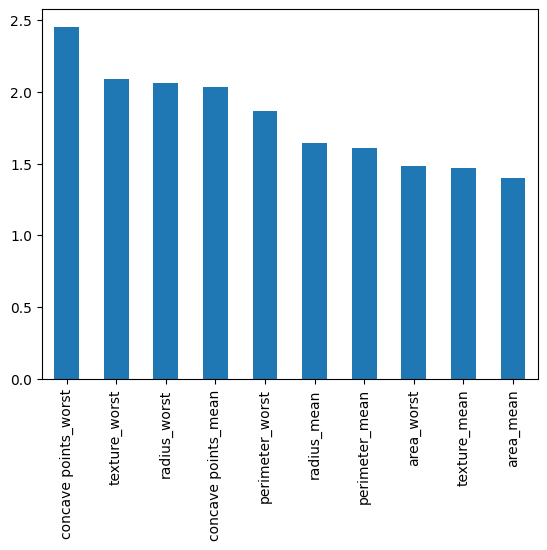

In [24]:
weights= pd.Series(model.coef_[0],
                    index= X.columns.values)
print(weights.sort_values(ascending= False)[:10].plot(kind='bar'))

En este gráfico superior vemos la importancia de las 10 variables más importantes al momento de realizar la predicción de un tumor maligno.

AxesSubplot(0.125,0.11;0.775x0.77)


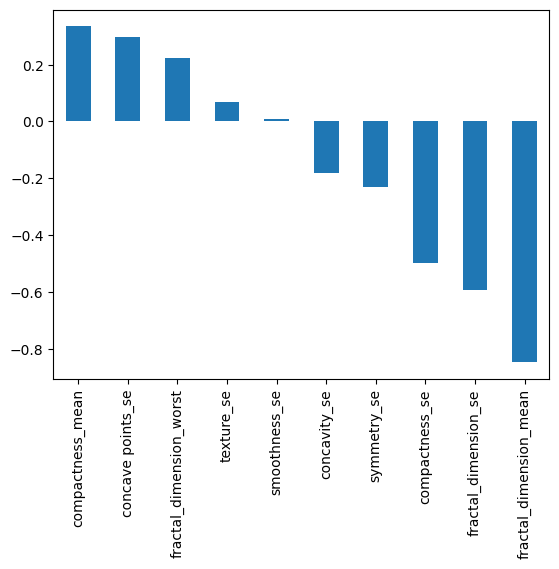

In [25]:
print(weights.sort_values(ascending= False)[-10:].plot(kind='bar'))

En este gráfico superior vemos la importancia de las 10 variables más importantes al momento de realizar la predicción de un tumor benigno.

<Figure size 1100x1100 with 0 Axes>

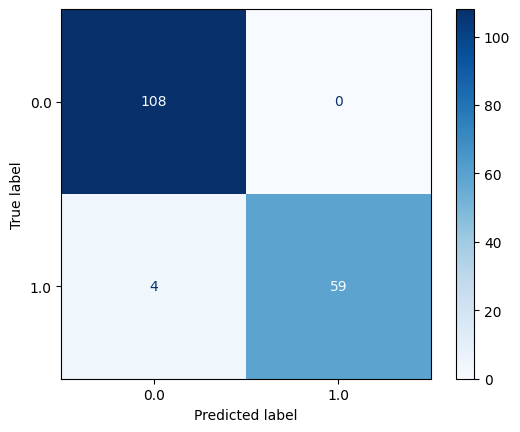

In [26]:
fig=plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

Esta matriz de confusión lo que indica es que para 108 casos en que el tumor era benigno lo predijo correctamente y en 59 casos en que el tumor era maligno lo predijo correctamente. Este modelo tiene solo 4 casos errados de un tumor maligno y lo predijo benigno.

In [27]:
recall= recall_score(y_test, prediction_test)
recall= round(recall * 100)
print(f"El modelo es capaz de identificar correctamente el {recall}% de los casos positivos")

El modelo es capaz de identificar correctamente el 94% de los casos positivos


## Conclusión

Se construyó un modelo de regresión logística para predecir el diagnóstico del cáncer de mama utilizando un dataset limpio y escalado. El modelo tiene una precisión del 97.66% y una exhaustividad del 94% en los datos de prueba. Estos resultados sugieren que el modelo es capaz de hacer predicciones precisas sobre el diagnóstico del cáncer de mama.

## Información de sesión

In [28]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=85529e1f-f1a6-4b31-bc05-8795d2fb7d7b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>